# Prediction
The 1987 National Indonesian Contraceptive survey revealed fertility rates of 3.3 children on average based on a full survey size of 11,884 households. This feature was created by dividing the age of the wife by how many children they have.

According to the 1987 National Indonesian Contraceptive Survey, the units of analysis were married households with at least one child.

- Here is the pamphlet from the original <a href='https://dhsprogram.com/pubs/pdf/SR9/SR9.pdf'>survey</a>.
- <a href='https://www.guttmacher.org/sites/default/files/pdfs/pubs/journals/3110605.pdf'>Here</a> is information about the 2002-2003 survey.

## Possible Predictions

### Predicting for a subset of these data
This is already a subset, but we can take a subset of it again. We can predict any of the following. A subset would be like
- Muslim only, wife not working

### Predicting Standard of Living (Ordinal)
**Methods:** 
- Multinomial Logistic Regression
- OV Logistic Regression

In this project, we are interested in predicting standard of living based on the other dataset covariates. Using standard of living as an outcome variable instead of the intended contraceptive column, we will be able to see if we can detect clear differences between households that have a higher standard of living than others.

### Predicting Contraceptive Use (Binary)
We may also be interested in looking at the intended predictive goal.

`contraceptive_use ~ .`

### Number of children (Non-negative)
**Methods:**
- Poisson Regression
- NegBin Regression
- Mixed-effect model of either Poisson or NegBin

## To Demonstrate

### Prediction Must-Haves
- Variable selection
    - Order by PCA, choose top few
    - Forward-backward regression
        - Backwards regression...
        - Full model -> subsets
- Cross-validation
    - What type of CV should we do?
- Calculate RMSE
- One-hot encoding

### Binary Prediction Must-Haves
- Show confusion matrix
- Accuracy rate
- False/true positive/negatives
- Precision, recall, false alarm rate

### Prediction Models
- Logistic Regression
    - Mixed-effect logit model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I'm using <a href='https://www.instagram.com/p/BxMjecChZ4_/'>this palette</a>.

In [2]:
colours_cafe = np.array(['#6B3231', '#DB565D', '#FACCAD', '#FF8A40'])
colours_cafe = sns.set_palette(sns.color_palette(colours_cafe))

In [3]:
contra_train = pd.read_csv('../../1-data/train.csv')
contra_test  = pd.read_csv('../../1-data/test.csv')

In [4]:
contra_train.shape

(1104, 13)

In [5]:
contra_train.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive,kids_per_year,education_gap,contraceptive_use
0,47,2,3,5,1,1,1,1,0,0,0.106383,1,0
1,30,4,4,2,0,0,3,3,0,1,0.066667,0,1
2,26,3,3,3,1,1,3,3,0,1,0.115385,0,1
3,42,2,4,2,1,1,3,4,0,0,0.047619,2,0
4,37,3,4,1,1,1,2,4,0,0,0.027027,1,0


In [ ]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

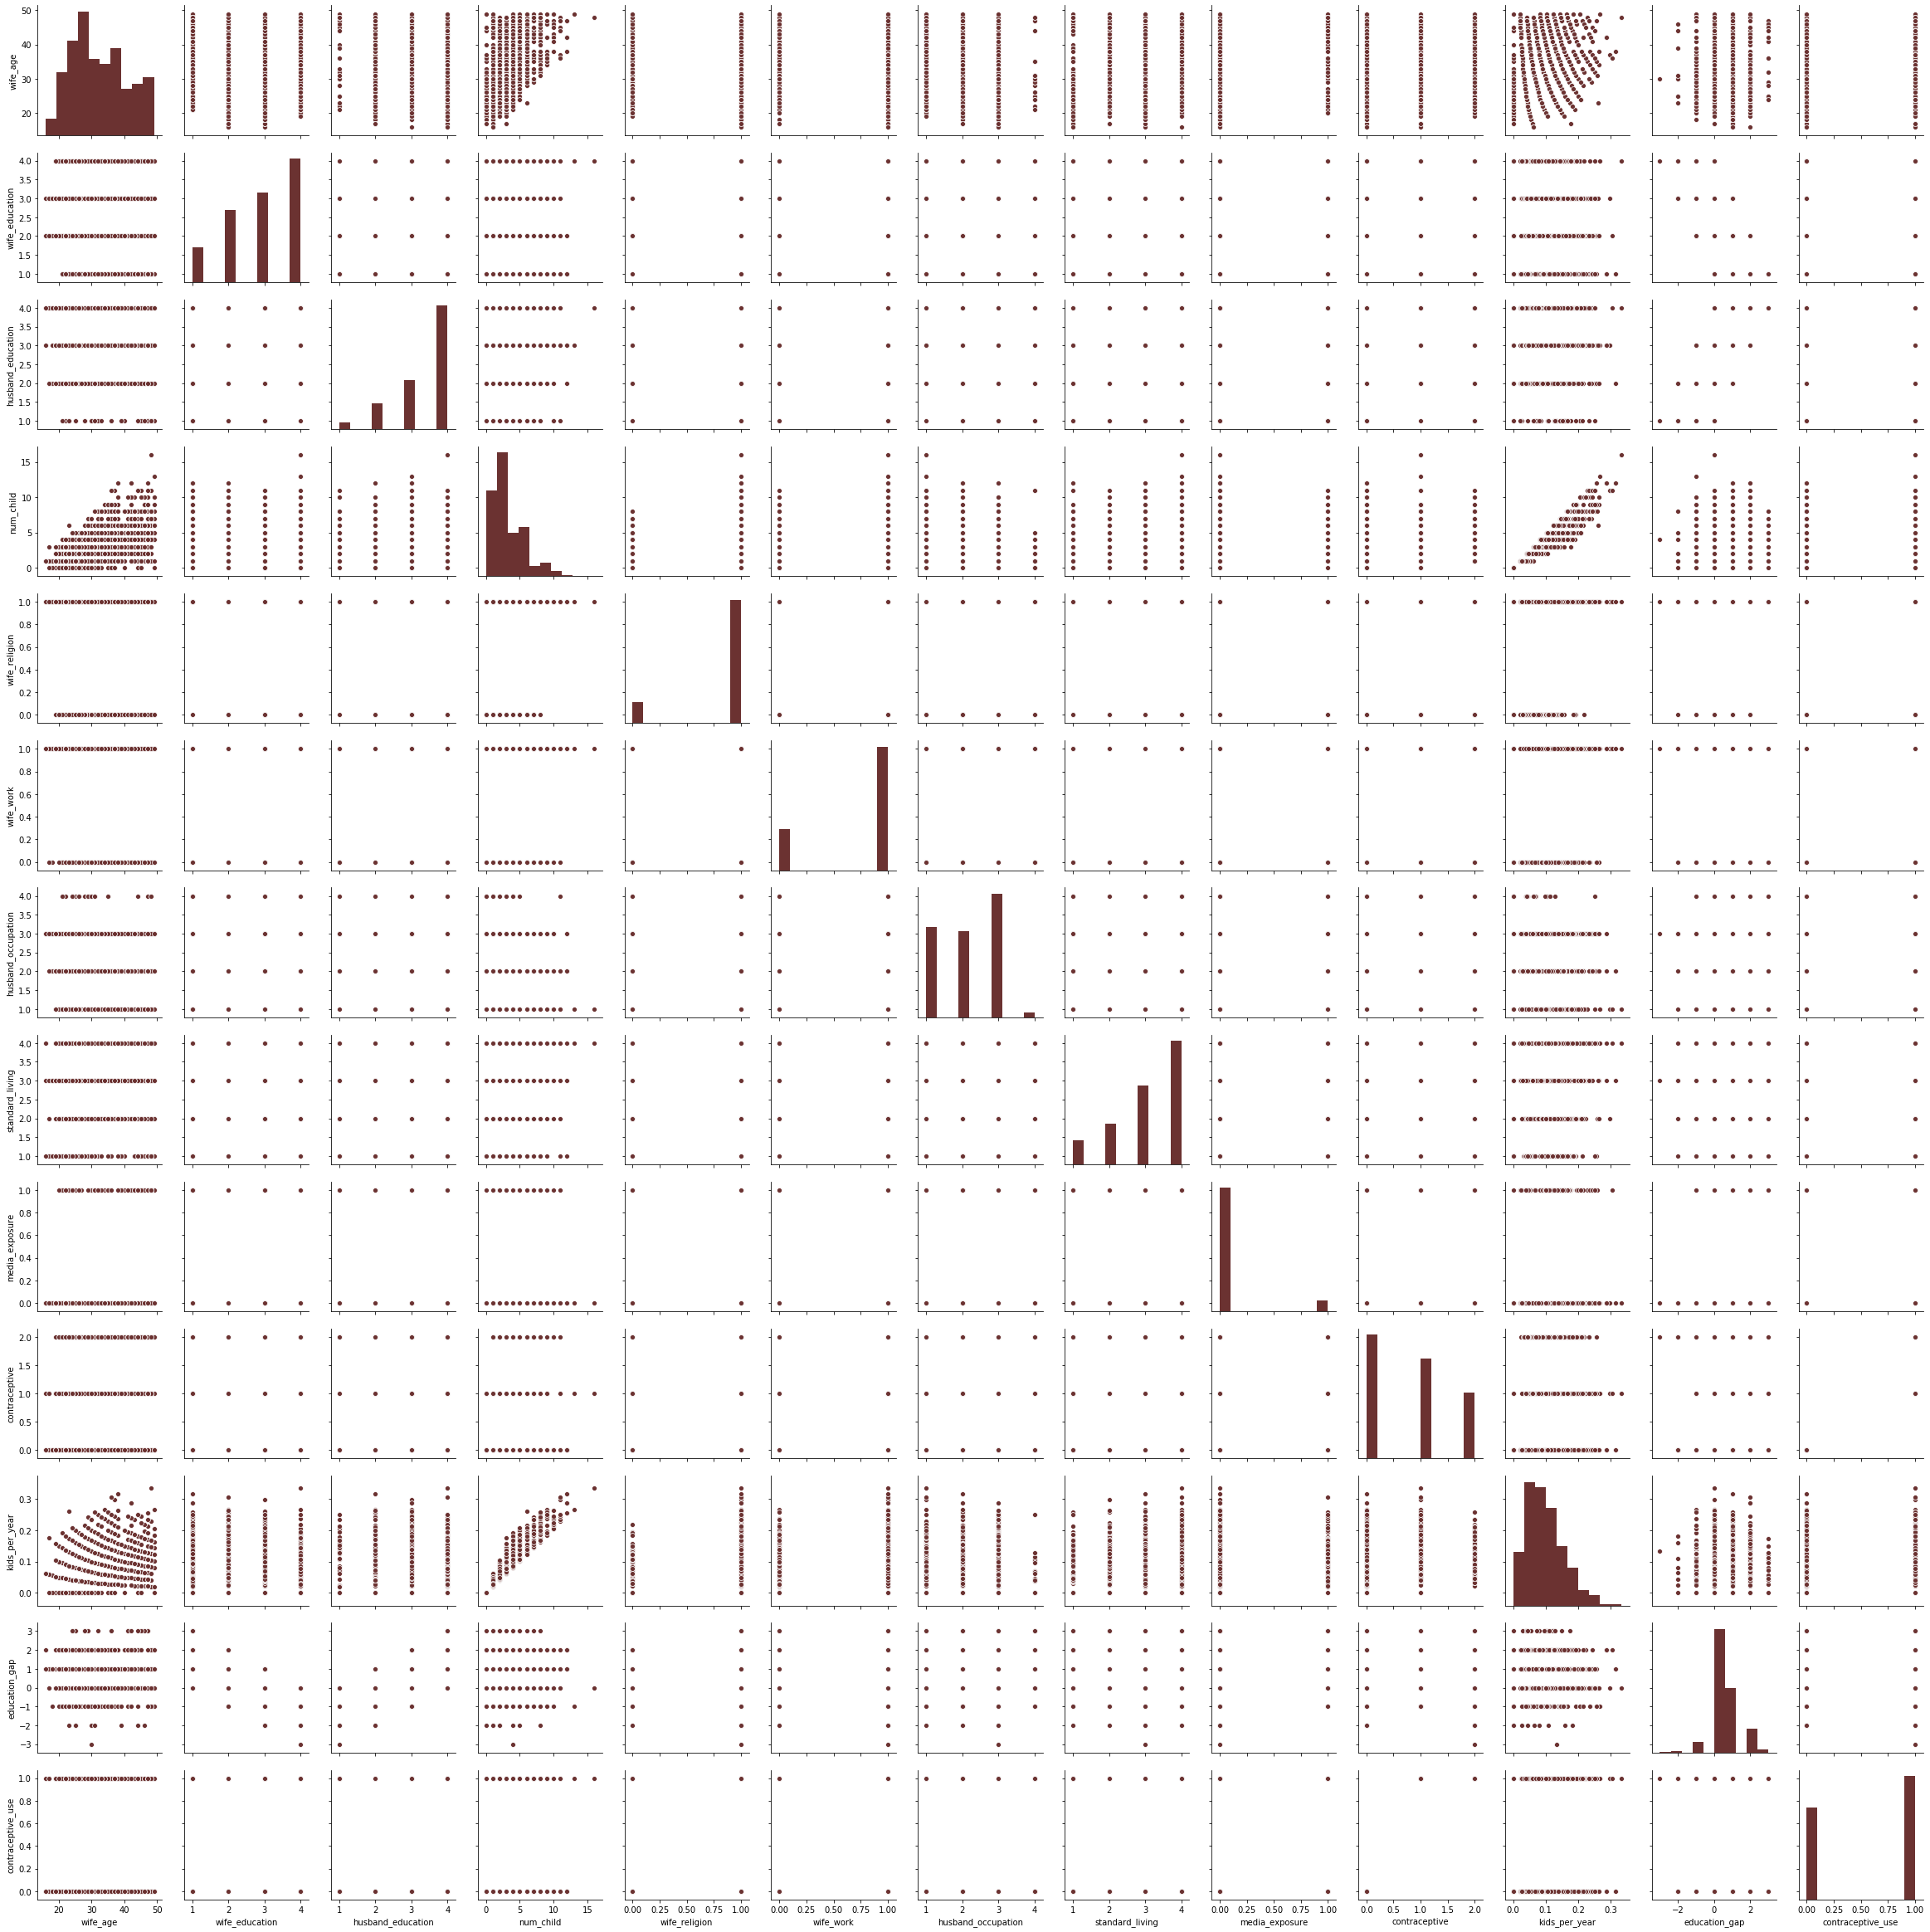

In [16]:
sns.pairplot(contra_train)

## Principal Components Analysis

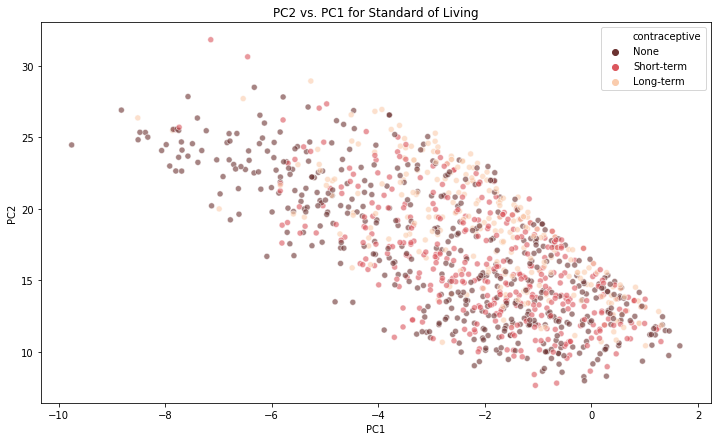

In [6]:
contra_features = contra_train.drop('contraceptive', axis=1)
contra_fixed = (contra_features - np.mean(contra_features, axis=0)) / np.std(contra_features)
u, s, vt = np.linalg.svd(contra_fixed, full_matrices=False)

contra_2d = np.dot(contra_features, pd.DataFrame(vt.T).iloc[:,0:2])
contra_2d = pd.DataFrame(contra_2d, columns=['PC1', 'PC2'])

plt.figure(figsize=(12, 7))
plt.title('PC2 vs. PC1 for Standard of Living')
sns.scatterplot(x=contra_2d['PC1'],
                y=contra_2d['PC2'],
                hue=contra_train['contraceptive'].map({0:'None', 1:'Short-term', 2:'Long-term'}),
                hue_order=['None', 'Short-term', 'Long-term'],
                palette=colours_cafe,
                alpha=0.6)
plt.show()

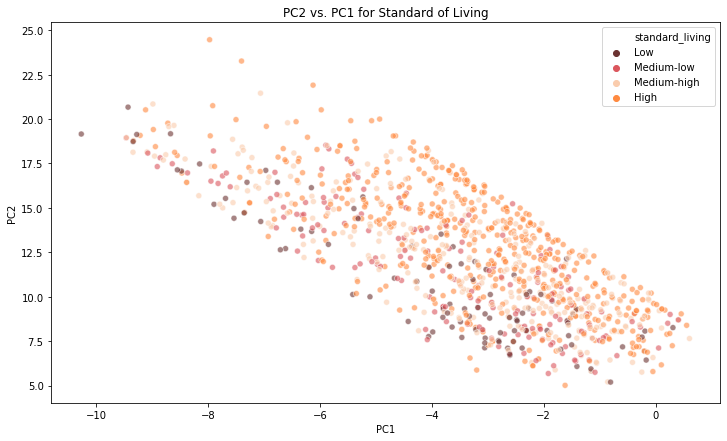

In [17]:
contra_features = contra_train.drop('standard_living', axis=1)
contra_fixed = (contra_features - np.mean(contra_features, axis=0)) / np.std(contra_features)
u, s, vt = np.linalg.svd(contra_fixed, full_matrices=False)

contra_2d = np.dot(contra_features, pd.DataFrame(vt.T).iloc[:,0:2])
contra_2d = pd.DataFrame(contra_2d, columns=['PC1', 'PC2'])

plt.figure(figsize=(12, 7))
plt.title('PC2 vs. PC1 for Standard of Living')
sns.scatterplot(x=contra_2d['PC1'],
                y=contra_2d['PC2'],
                hue=contra_train['standard_living'].map({1:'Low', 2:'Medium-low', 3:'Medium-high', 4:'High'}),
                hue_order=['Low', 'Medium-low', 'Medium-high', 'High'],
                palette=colours_cafe,
                alpha=0.6)
plt.show()

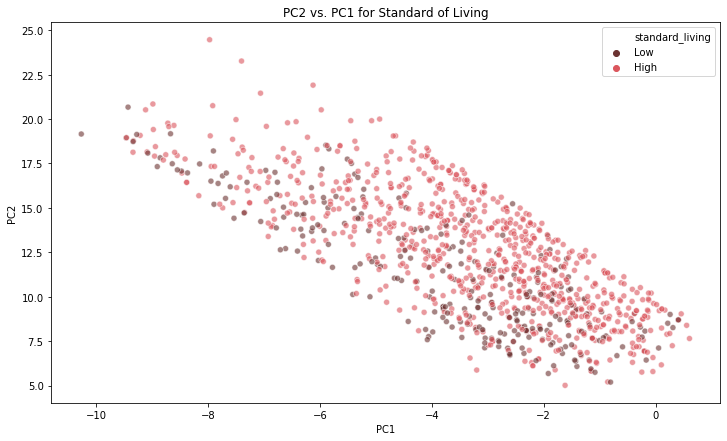

In [18]:
contra_features = contra_train.drop('standard_living', axis=1)
contra_fixed = (contra_features - np.mean(contra_features, axis=0)) / np.std(contra_features)
u, s, vt = np.linalg.svd(contra_fixed, full_matrices=False)

contra_2d = np.dot(contra_features, pd.DataFrame(vt.T).iloc[:,0:2])
contra_2d = pd.DataFrame(contra_2d, columns=['PC1', 'PC2'])

plt.figure(figsize=(12, 7))
plt.title('PC2 vs. PC1 for Standard of Living')
sns.scatterplot(x=contra_2d['PC1'],
                y=contra_2d['PC2'],
                hue=contra_train['standard_living'].map({1:'Low', 2:'Low', 3:'High', 4:'High'}),
                hue_order=['Low', 'High'],
                palette=colours_cafe,
                alpha=0.6)
plt.show()

## Multinomial Logistic Regression

## Contraceptive Method

In [8]:
from sklearn.linear_model import LogisticRegression
multinomial_logit = LogisticRegression(multi_class='multinomial', solver='newton-cg')
multinomial_logit.fit(X=contra_train.drop('contraceptive', axis=1),
                      y=contra_train['contraceptive'])

train_accuracy = multinomial_logit.score(X=contra_train.drop('contraceptive', axis=1),
                                         y=contra_train['contraceptive'])
test_accuracy  = multinomial_logit.score(X=contra_test.drop('contraceptive', axis=1),
                                         y=contra_test['contraceptive'])

[train_accuracy, test_accuracy]

[0.8052536231884058, 0.7723577235772358]

In [9]:
from sklearn.linear_model import LogisticRegressionCV
multinomial_logit_cv = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='newton-cg')
multinomial_logit_cv.fit(X=contra_train.drop('contraceptive', axis=1),
                         y=contra_train['contraceptive'])

train_accuracy = multinomial_logit_cv.score(X=contra_train.drop('contraceptive', axis=1),
                                            y=contra_train['contraceptive'])
test_accuracy  = multinomial_logit_cv.score(X=contra_test.drop('contraceptive', axis=1),
                                            y=contra_test['contraceptive'])

[train_accuracy, test_accuracy]

[0.8061594202898551, 0.7723577235772358]

## Standard of Living

In [10]:
from sklearn.linear_model import LogisticRegression
multinomial_logit = LogisticRegression(multi_class='multinomial', solver='newton-cg')
multinomial_logit.fit(X=contra_train.drop('standard_living', axis=1),
                      y=contra_train['standard_living'])

train_accuracy = multinomial_logit.score(X=contra_train.drop('standard_living', axis=1),
                                         y=contra_train['standard_living'])
test_accuracy  = multinomial_logit.score(X=contra_test.drop('standard_living', axis=1),
                                         y=contra_test['standard_living'])

[train_accuracy, test_accuracy]

[0.5018115942028986, 0.46070460704607047]

In [11]:
from sklearn.linear_model import LogisticRegressionCV
multinomial_logit_cv = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='newton-cg')
multinomial_logit_cv.fit(X=contra_train.drop('standard_living', axis=1),
                         y=contra_train['standard_living'])

train_accuracy = multinomial_logit_cv.score(X=contra_train.drop('standard_living', axis=1),
                                            y=contra_train['standard_living'])
test_accuracy  = multinomial_logit_cv.score(X=contra_test.drop('standard_living', axis=1),
                                            y=contra_test['standard_living'])

[train_accuracy, test_accuracy]

[0.483695652173913, 0.4634146341463415]

# Decision Trees

## Contraceptive Method


In [12]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X=contra_train.drop('contraceptive', axis=1),
                  y=contra_train['contraceptive'])

train_accuracy = decision_tree.score(X=contra_train.drop('contraceptive', axis=1),
                                     y=contra_train['contraceptive'])
test_accuracy  = decision_tree.score(X=contra_test.drop('contraceptive', axis=1),
                                     y=contra_test['contraceptive'])

[train_accuracy, test_accuracy]

[0.980072463768116, 0.7398373983739838]

## Standard of Living

In [13]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X=contra_train.drop('standard_living', axis=1),
                  y=contra_train['standard_living'])

train_accuracy = decision_tree.score(X=contra_train.drop('standard_living', axis=1),
                                     y=contra_train['standard_living'])
test_accuracy  = decision_tree.score(X=contra_test.drop('standard_living', axis=1),
                                     y=contra_test['standard_living'])

[train_accuracy, test_accuracy]

[0.9737318840579711, 0.4173441734417344]

# Random Forests

## Contraceptive Method


In [14]:
from sklearn import ensemble
random_forest = ensemble.RandomForestClassifier(n_estimators=20)
random_forest.fit(X=contra_train.drop('contraceptive', axis=1),
                  y=contra_train['contraceptive'])

train_accuracy = random_forest.score(X=contra_train.drop('contraceptive', axis=1),
                                     y=contra_train['contraceptive'])
test_accuracy  = random_forest.score(X=contra_test.drop('contraceptive', axis=1),
                                     y=contra_test['contraceptive'])

[train_accuracy, test_accuracy]

[0.9782608695652174, 0.7533875338753387]

## Standard of Living

In [15]:
from sklearn import ensemble
random_forest = ensemble.RandomForestClassifier(n_estimators=20)
random_forest.fit(X=contra_train.drop('standard_living', axis=1),
                  y=contra_train['standard_living'])

train_accuracy = random_forest.score(X=contra_train.drop('standard_living', axis=1),
                                     y=contra_train['standard_living'])
test_accuracy  = random_forest.score(X=contra_test.drop('standard_living', axis=1),
                                     y=contra_test['standard_living'])

[train_accuracy, test_accuracy]

[0.9664855072463768, 0.46883468834688347]